In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
mtalbert = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2018-07-07 11:15:00,0.0,10.400,37.364
1,2018-07-07 11:30:00,0.0,10.400,37.594
2,2018-07-07 11:45:00,0.0,10.400,37.590
3,2018-07-07 12:00:00,0.0,10.500,37.587
4,2018-07-07 12:15:00,0.0,10.500,37.584
...,...,...,...,...
187524,2024-10-21 19:00:00,0.0,18.391,46.736
187525,2024-10-21 19:15:00,0.0,18.313,46.861
187526,2024-10-21 19:30:00,0.0,18.316,46.861
187527,2024-10-21 19:45:00,0.0,18.313,46.866


In [38]:
mtalbert = mtalbert.set_index('Timestamp (UTC+12:00)')

mtalbert_soil = mtalbert.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\771627204.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  mtalbert_soil = mtalbert.resample('30T').agg({


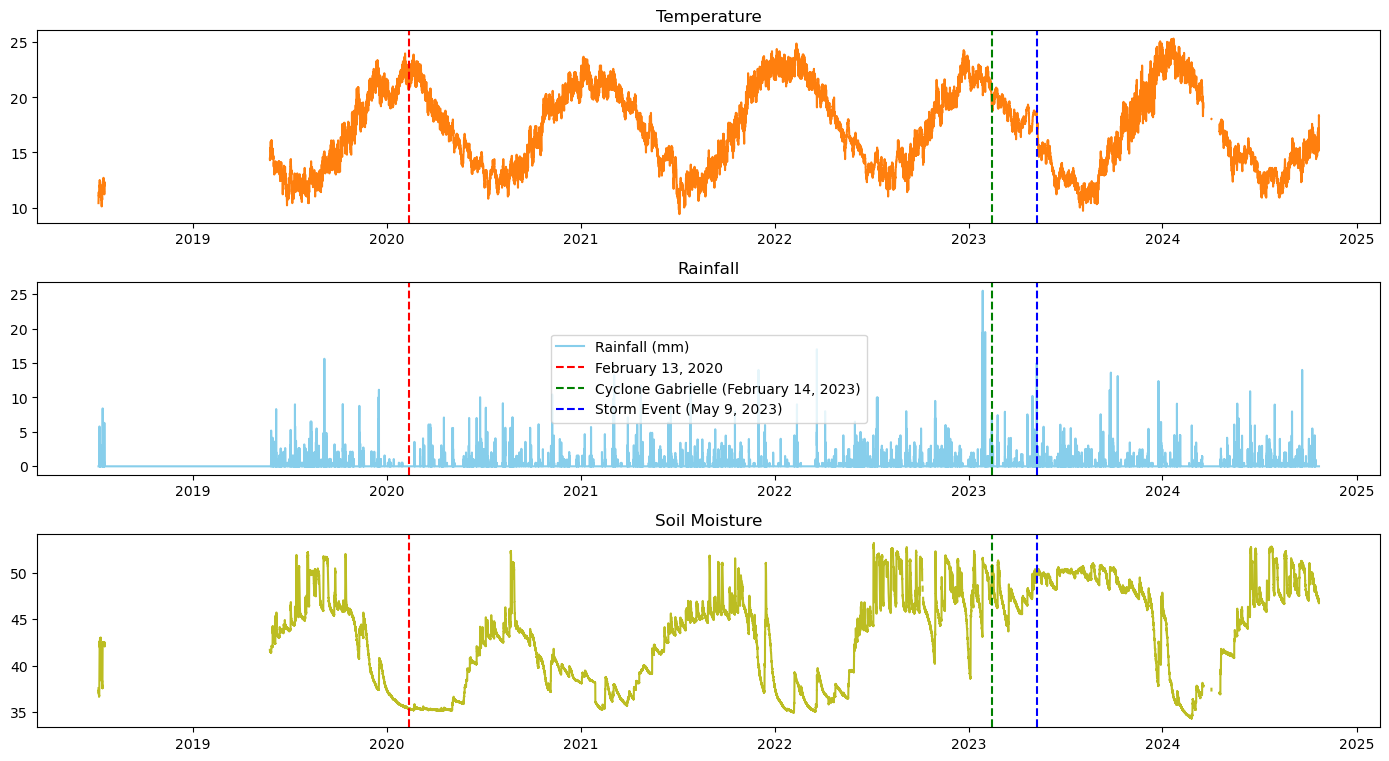

In [39]:
start_date = '2018-07-07 11:15:00'
end_date = '2024-10-21 20:00:00'

impact_data = mtalbert_soil.loc[start_date:end_date]


plt.figure(figsize=(14, 10))

# Temperature plot
plt.subplot(4, 1, 1)
plt.plot(impact_data.index, impact_data['SoilTemp(c)'], label='Temperature (C)', color='tab:orange')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.title('Temperature')

# Rainfall plot
plt.subplot(4, 1, 2)
plt.plot(impact_data.index, impact_data['Rain(mm)'], label='Rainfall (mm)', color='skyblue')  
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.title('Rainfall')
plt.legend(loc ="center")

# Soil Moisture plot
plt.subplot(4, 1, 3)
plt.plot(impact_data.index, impact_data['SoilMoisture(%)'], label='Soil Moisture (%)', color='tab:olive')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.title('Soil Moisture')

plt.tight_layout()
plt.show()

In [40]:
mtalbert_soil.describe()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
count,110323.000000,93777.000000,93777.000000
mean,0.066016,17.079692,43.446462
std,0.439088,3.664874,5.155746
min,0.000000,9.400000,34.324000
25%,0.000000,13.900000,38.480000
50%,0.000000,16.700000,44.231000
75%,0.000000,20.350000,47.577000
max,25.500000,25.350000,53.249000


In [41]:
ararimu = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/ArarimuCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
ararimu


,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2014-05-29 03:45:00,0.0,9.700,44.279
1,2014-05-29 04:00:00,0.0,9.700,44.279
2,2014-05-29 04:15:00,0.0,9.700,44.279
3,2014-05-29 04:30:00,0.0,9.500,44.167
4,2014-05-29 04:45:00,0.0,9.500,44.165
...,...,...,...,...
323813,2024-09-09 20:30:00,0.0,14.336,52.245
323814,2024-09-09 20:45:00,0.0,14.333,52.249
323815,2024-09-09 21:00:00,0.0,14.333,52.247
323816,2024-09-09 21:15:00,0.0,14.333,52.247


In [42]:
ararimu = ararimu.set_index('Timestamp (UTC+12:00)')

ararimu_soil = ararimu.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})


C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\2026477855.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ararimu_soil = ararimu.resample('30T').agg({


In [43]:
ararimu_soil

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2014-05-29 03:30:00,0.0,9.7000,44.279
2014-05-29 04:00:00,0.0,9.7000,44.279
2014-05-29 04:30:00,0.0,9.5000,44.166
2014-05-29 05:00:00,0.0,9.5000,44.166
2014-05-29 05:30:00,0.0,9.5000,44.165
...,...,...,...
2024-09-09 19:30:00,0.0,14.3375,52.250
2024-09-09 20:00:00,0.0,14.3360,52.248
2024-09-09 20:30:00,0.0,14.3345,52.247


In [44]:
ararimu_soil.describe()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
count,180325.000000,161916.000000,161916.000000
mean,0.078139,16.411753,46.706916
std,0.499081,3.929652,6.495194
min,0.000000,5.200000,30.951000
25%,0.000000,13.100000,42.277000
50%,0.000000,16.150000,48.078000
75%,0.000000,19.600000,51.575000
max,30.910000,29.850000,69.878000


In [45]:
mtalbert_soil.columns = ['Rain_MtAlbert(mm)', 'SoilTemp_MtAlbert(c)', 'SoilMoisture_MtAlbert(%)']
ararimu_soil.columns = ['Rain_Ararimu(mm)', 'SoilTemp_Ararimu(c)', 'SoilMoisture_Ararimu(%)']

soil_data = pd.merge(mtalbert_soil, ararimu_soil, left_index=True, right_index=True, how='outer')
soil_data = soil_data.sort_index()

soil_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182338 entries, 2014-05-29 03:30:00 to 2024-10-21 20:00:00
Freq: 30min
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rain_MtAlbert(mm)         110323 non-null  float64
 1   SoilTemp_MtAlbert(c)      93777 non-null   float64
 2   SoilMoisture_MtAlbert(%)  93777 non-null   float64
 3   Rain_Ararimu(mm)          180325 non-null  float64
 4   SoilTemp_Ararimu(c)       161916 non-null  float64
 5   SoilMoisture_Ararimu(%)   161916 non-null  float64
dtypes: float64(6)
memory usage: 9.7 MB


In [46]:
soil_data = soil_data.dropna()
soil_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91761 entries, 2018-07-07 11:00:00 to 2024-09-09 21:30:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rain_MtAlbert(mm)         91761 non-null  float64
 1   SoilTemp_MtAlbert(c)      91761 non-null  float64
 2   SoilMoisture_MtAlbert(%)  91761 non-null  float64
 3   Rain_Ararimu(mm)          91761 non-null  float64
 4   SoilTemp_Ararimu(c)       91761 non-null  float64
 5   SoilMoisture_Ararimu(%)   91761 non-null  float64
dtypes: float64(6)
memory usage: 4.9 MB


In [47]:
soil_data

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%)
Timestamp (UTC+12:00),,,,,,
2018-07-07 11:00:00,0.0,10.4,37.3640,0.0,9.9000,54.727
2018-07-07 11:30:00,0.0,10.4,37.5920,0.0,9.9000,54.621
2018-07-07 12:00:00,0.0,10.5,37.5855,0.0,10.1000,54.567
2018-07-07 12:30:00,0.0,10.7,37.4620,0.0,10.2000,54.514
2018-07-07 13:00:00,0.0,10.7,37.5720,0.0,10.2500,54.459
...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.0,49.0040,0.0,14.3375,52.250
2024-09-09 20:00:00,0.0,14.9,48.8710,0.0,14.3360,52.248
2024-09-09 20:30:00,0.0,14.9,48.8260,0.0,14.3345,52.247


In [48]:
# Save the combined data to a new CSV file
awhitu = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/awhituCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
awhitu.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2014-05-27 17:45:00,0.0,14.2,43.589
1,2014-05-27 18:00:00,0.0,14.2,43.587
2,2014-05-27 18:15:00,0.0,14.0,43.586
3,2014-05-27 18:30:00,0.0,14.0,43.561
4,2014-05-27 18:45:00,0.0,13.9,43.561


In [49]:
awhitu.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
count,272586,272586.000000,272575.000000,272586.000000
mean,2019-09-11 22:37:39.324029952,0.039299,17.897929,44.931976
min,2014-05-27 17:45:00,0.000000,7.900000,31.342000
25%,2016-05-07 01:18:45,0.000000,13.900000,42.481000
50%,2020-08-13 07:22:30,0.000000,17.400000,45.801500
75%,2022-07-31 03:56:15,0.000000,21.600000,47.157000
max,2024-09-10 21:45:00,23.060000,30.300000,53.619000
std,NaN,0.285745,4.529196,2.837952


In [50]:
awhitu = awhitu.set_index('Timestamp (UTC+12:00)')

awhitu_soil = awhitu.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

awhitu_soil.columns = ['Rain_awhitu(mm)', 'SoilTemp_awhitu(c)', 'SoilMoisture_awhitu(%)']

soil_data = pd.merge(soil_data, awhitu_soil, left_index=True, right_index=True, how='outer')
soil_data = soil_data.sort_index()
soil_data = soil_data.dropna()


soil_data.info()
soil_data

C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\4224362398.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  awhitu_soil = awhitu.resample('30T').agg({


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78962 entries, 2018-07-07 11:00:00 to 2024-09-09 21:30:00
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rain_MtAlbert(mm)         78962 non-null  float64
 1   SoilTemp_MtAlbert(c)      78962 non-null  float64
 2   SoilMoisture_MtAlbert(%)  78962 non-null  float64
 3   Rain_Ararimu(mm)          78962 non-null  float64
 4   SoilTemp_Ararimu(c)       78962 non-null  float64
 5   SoilMoisture_Ararimu(%)   78962 non-null  float64
 6   Rain_awhitu(mm)           78962 non-null  float64
 7   SoilTemp_awhitu(c)        78962 non-null  float64
 8   SoilMoisture_awhitu(%)    78962 non-null  float64
dtypes: float64(9)
memory usage: 6.0 MB


,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%)
Timestamp (UTC+12:00),,,,,,,,,
2018-07-07 11:00:00,0.0,10.4,37.3640,0.0,9.9000,54.727,0.0,10.25,34.5315
2018-07-07 11:30:00,0.0,10.4,37.5920,0.0,9.9000,54.621,0.0,10.30,32.0295
2018-07-07 12:00:00,0.0,10.5,37.5855,0.0,10.1000,54.567,0.0,10.50,32.0370
2018-07-07 12:30:00,0.0,10.7,37.4620,0.0,10.2000,54.514,0.0,10.65,31.9680
2018-07-07 13:00:00,0.0,10.7,37.5720,0.0,10.2500,54.459,0.0,10.75,31.9665
...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.0,49.0040,0.0,14.3375,52.250,0.0,13.70,48.0950
2024-09-09 20:00:00,0.0,14.9,48.8710,0.0,14.3360,52.248,0.0,13.70,48.0945
2024-09-09 20:30:00,0.0,14.9,48.8260,0.0,14.3345,52.247,0.0,13.70,48.1175


In [51]:
hoteo = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/hoteoCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
hoteo.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2023-02-08 05:15:00,0.0,21.8,47.376
1,2023-02-08 05:30:00,0.0,21.7,47.472
2,2023-02-08 05:45:00,0.0,21.6,47.472
3,2023-02-08 06:00:00,0.0,21.5,47.472
4,2023-02-08 06:15:00,0.0,21.4,47.472


In [52]:
kaipara = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/Kaipara_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
kaipara.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2014-07-08 00:30:00,0.0,13.4,39.218
1,2014-07-08 00:45:00,0.0,13.3,39.220
2,2014-07-08 01:00:00,0.0,13.3,39.220
3,2014-07-08 01:15:00,0.0,13.3,39.220
4,2014-07-08 01:30:00,0.0,13.3,39.221


In [53]:
kaipara.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
count,328399,328399.000000,328399.000000,328399.000000
mean,2019-08-28 11:57:43.464870656,0.033018,17.596703,36.080888
min,2014-07-08 00:30:00,0.000000,7.000000,26.181667
25%,2016-11-09 05:22:30,0.000000,13.900000,33.121000
50%,2019-12-27 21:00:00,0.000000,17.000000,37.293000
75%,2022-05-08 15:22:30,0.000000,21.000000,39.032500
max,2024-09-09 21:45:00,15.090000,33.100000,47.686000
std,NaN,0.248721,4.404020,3.841375


In [54]:
kaipara = kaipara.set_index('Timestamp (UTC+12:00)')

kaipara_soil = kaipara.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

kaipara_soil.columns = ['Rain_kaipara(mm)', 'SoilTemp_kaipara(c)', 'SoilMoisture_kaipara(%)']

soil_data = pd.merge(soil_data, kaipara_soil, left_index=True, right_index=True, how='outer')
soil_data = soil_data.sort_index()
soil_data = soil_data.dropna()


soil_data.info()
soil_data

C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\315704556.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  kaipara_soil = kaipara.resample('30T').agg({


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78600 entries, 2018-07-07 11:00:00 to 2024-09-09 21:30:00
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rain_MtAlbert(mm)         78600 non-null  float64
 1   SoilTemp_MtAlbert(c)      78600 non-null  float64
 2   SoilMoisture_MtAlbert(%)  78600 non-null  float64
 3   Rain_Ararimu(mm)          78600 non-null  float64
 4   SoilTemp_Ararimu(c)       78600 non-null  float64
 5   SoilMoisture_Ararimu(%)   78600 non-null  float64
 6   Rain_awhitu(mm)           78600 non-null  float64
 7   SoilTemp_awhitu(c)        78600 non-null  float64
 8   SoilMoisture_awhitu(%)    78600 non-null  float64
 9   Rain_kaipara(mm)          78600 non-null  float64
 10  SoilTemp_kaipara(c)       78600 non-null  float64
 11  SoilMoisture_kaipara(%)   78600 non-null  float64
dtypes: float64(12)
memory usage: 7.8 MB


,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),SoilTemp_kaipara(c),SoilMoisture_kaipara(%)
Timestamp (UTC+12:00),,,,,,,,,,,,
2018-07-07 11:00:00,0.0,10.4,37.3640,0.0,9.9000,54.727,0.0,10.25,34.5315,0.0,11.450,38.2160
2018-07-07 11:30:00,0.0,10.4,37.5920,0.0,9.9000,54.621,0.0,10.30,32.0295,0.0,11.650,38.2140
2018-07-07 12:00:00,0.0,10.5,37.5855,0.0,10.1000,54.567,0.0,10.50,32.0370,0.0,11.900,38.2720
2018-07-07 12:30:00,0.0,10.7,37.4620,0.0,10.2000,54.514,0.0,10.65,31.9680,0.0,12.250,38.3260
2018-07-07 13:00:00,0.0,10.7,37.5720,0.0,10.2500,54.459,0.0,10.75,31.9665,0.0,12.600,38.3230
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.0,49.0040,0.0,14.3375,52.250,0.0,13.70,48.0950,0.0,14.750,40.8100
2024-09-09 20:00:00,0.0,14.9,48.8710,0.0,14.3360,52.248,0.0,13.70,48.0945,0.0,14.675,40.8110
2024-09-09 20:30:00,0.0,14.9,48.8260,0.0,14.3345,52.247,0.0,13.70,48.1175,0.0,14.671,40.8100


In [55]:
mangemangeroa = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/mangemangeroaCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mangemangeroa.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2014-05-28 03:00:00,0.0,17.0,44.654
1,2014-05-28 03:45:00,0.0,17.0,44.654
2,2014-05-28 04:00:00,0.0,17.0,44.654
3,2014-05-28 04:45:00,0.0,17.0,44.654
4,2014-05-28 05:00:00,0.0,17.0,44.654


In [56]:
tamahunga = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/tamahungaCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
tamahunga.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2023-02-08 05:15:00,0.0,21.9,49.149
1,2023-02-08 05:30:00,0.0,21.9,49.148
2,2023-02-08 05:45:00,0.0,21.9,49.149
3,2023-02-08 06:00:00,0.0,21.9,49.031
4,2023-02-08 06:15:00,0.0,21.9,49.149


In [57]:
tamahunga.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
count,54867,54867.000000,54867.000000,54867.000000
mean,2023-11-22 22:53:13.247307008,0.048841,17.667268,48.280474
min,2023-02-08 05:15:00,0.000000,10.200000,39.301000
25%,2023-07-02 13:07:30,0.000000,14.400000,47.045000
50%,2023-11-22 10:45:00,0.000000,17.500000,50.056000
75%,2024-04-13 07:52:30,0.000000,20.600000,50.476000
max,2024-09-09 21:15:00,21.750000,26.600000,51.792000
std,NaN,0.350953,3.801377,3.310767


In [58]:
tomarata = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/tomarataCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
tomarata.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2019-05-26 04:00:00,0.0,15.229,35.790667
1,2019-05-26 04:15:00,0.0,15.200,33.602000
2,2019-05-26 04:30:00,0.0,15.200,33.602000
3,2019-05-26 04:45:00,0.0,15.200,33.602000
4,2019-05-26 05:00:00,0.0,15.200,33.605000


In [59]:
tomarata.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
count,185358,185358.000000,185358.000000,185358.000000
mean,2022-01-17 07:07:14.020652544,0.042974,16.540053,34.975655
min,2019-05-26 04:00:00,0.000000,6.700000,9.017000
25%,2020-09-19 20:48:45,0.000000,13.300000,28.766000
50%,2022-01-16 05:07:30,0.000000,16.100000,37.900000
75%,2023-05-17 04:26:15,0.000000,19.588000,42.469000
max,2024-09-10 21:45:00,21.000000,31.700000,53.509000
std,NaN,0.304598,3.933627,9.913681


In [60]:
tomarata = tomarata.set_index('Timestamp (UTC+12:00)')

tomarata_soil = tomarata.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

tomarata_soil.columns = ['Rain_tomarata(mm)', 'SoilTemp_tomarata(c)', 'SoilMoisture_tomarata(%)']

soil_data = pd.merge(soil_data, tomarata_soil, left_index=True, right_index=True, how='outer')
soil_data = soil_data.sort_index()
soil_data = soil_data.dropna()


soil_data.info()
soil_data

C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\214687428.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tomarata_soil = tomarata.resample('30T').agg({


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77871 entries, 2019-12-10 22:30:00 to 2024-09-09 21:30:00
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rain_MtAlbert(mm)         77871 non-null  float64
 1   SoilTemp_MtAlbert(c)      77871 non-null  float64
 2   SoilMoisture_MtAlbert(%)  77871 non-null  float64
 3   Rain_Ararimu(mm)          77871 non-null  float64
 4   SoilTemp_Ararimu(c)       77871 non-null  float64
 5   SoilMoisture_Ararimu(%)   77871 non-null  float64
 6   Rain_awhitu(mm)           77871 non-null  float64
 7   SoilTemp_awhitu(c)        77871 non-null  float64
 8   SoilMoisture_awhitu(%)    77871 non-null  float64
 9   Rain_kaipara(mm)          77871 non-null  float64
 10  SoilTemp_kaipara(c)       77871 non-null  float64
 11  SoilMoisture_kaipara(%)   77871 non-null  float64
 12  Rain_tomarata(mm)         77871 non-null  float64
 13  SoilTemp_tomarata(c)      

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),SoilTemp_kaipara(c),SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.2000,36.790,0.0,24.20,38.945333,0.0,22.650,29.0160,0.0,20.400,28.1220
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.1000,36.840,0.0,24.00,40.828000,0.0,22.350,28.9685,0.0,20.350,28.2135
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.9000,36.840,0.0,23.85,40.800000,0.0,22.200,28.9720,0.0,20.200,28.1235
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.8000,36.838,0.0,23.65,40.803000,0.0,21.950,28.9705,0.0,20.150,28.3090
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.7500,36.838,0.0,23.45,40.803000,0.0,21.950,28.9465,0.0,20.000,28.3090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.00,49.0040,0.0,14.3375,52.250,0.0,13.70,48.095000,0.0,14.750,40.8100,0.0,13.963,38.4910
2024-09-09 20:00:00,0.0,14.90,48.8710,0.0,14.3360,52.248,0.0,13.70,48.094500,0.0,14.675,40.8110,0.0,13.963,38.5300
2024-09-09 20:30:00,0.0,14.90,48.8260,0.0,14.3345,52.247,0.0,13.70,48.117500,0.0,14.671,40.8100,0.0,13.925,38.4120


In [61]:
waitangi = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/waitangiCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
waitangi.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2014-05-29 19:00:00,0.0,13.8,43.549
1,2014-05-29 19:15:00,0.0,13.8,43.513
2,2014-05-29 19:30:00,0.0,13.8,43.513
3,2014-05-29 19:45:00,0.0,13.8,43.549
4,2014-05-29 20:00:00,0.0,13.8,43.548


In [62]:
waitangi = waitangi.set_index('Timestamp (UTC+12:00)')

waitangi_soil = waitangi.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

waitangi_soil.columns = ['Rain_Waitangi(mm)', 'SoilTemp_Waitangi(c)', 'SoilMoisture_Waitangi(%)']

soil_data = pd.merge(soil_data, waitangi_soil, left_index=True, right_index=True, how='outer')
soil_data = soil_data.sort_index()
soil_data = soil_data.dropna()


soil_data.info()
soil_data

C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\2851590874.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  waitangi_soil = waitangi.resample('30T').agg({


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77731 entries, 2019-12-10 22:30:00 to 2024-09-09 21:30:00
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rain_MtAlbert(mm)         77731 non-null  float64
 1   SoilTemp_MtAlbert(c)      77731 non-null  float64
 2   SoilMoisture_MtAlbert(%)  77731 non-null  float64
 3   Rain_Ararimu(mm)          77731 non-null  float64
 4   SoilTemp_Ararimu(c)       77731 non-null  float64
 5   SoilMoisture_Ararimu(%)   77731 non-null  float64
 6   Rain_awhitu(mm)           77731 non-null  float64
 7   SoilTemp_awhitu(c)        77731 non-null  float64
 8   SoilMoisture_awhitu(%)    77731 non-null  float64
 9   Rain_kaipara(mm)          77731 non-null  float64
 10  SoilTemp_kaipara(c)       77731 non-null  float64
 11  SoilMoisture_kaipara(%)   77731 non-null  float64
 12  Rain_tomarata(mm)         77731 non-null  float64
 13  SoilTemp_tomarata(c)      

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),SoilTemp_kaipara(c),SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.2000,36.790,0.0,24.20,38.945333,0.0,22.650,29.0160,0.0,20.400,28.1220,0.0,21.6500,40.1145
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.1000,36.840,0.0,24.00,40.828000,0.0,22.350,28.9685,0.0,20.350,28.2135,0.0,21.5000,40.1340
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.9000,36.840,0.0,23.85,40.800000,0.0,22.200,28.9720,0.0,20.200,28.1235,0.0,21.3000,40.1345
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.8000,36.838,0.0,23.65,40.803000,0.0,21.950,28.9705,0.0,20.150,28.3090,0.0,21.1500,40.0620
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.7500,36.838,0.0,23.45,40.803000,0.0,21.950,28.9465,0.0,20.000,28.3090,0.0,20.9500,40.1360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.00,49.0040,0.0,14.3375,52.250,0.0,13.70,48.095000,0.0,14.750,40.8100,0.0,13.963,38.4910,0.0,14.1860,34.5020
2024-09-09 20:00:00,0.0,14.90,48.8710,0.0,14.3360,52.248,0.0,13.70,48.094500,0.0,14.675,40.8110,0.0,13.963,38.5300,0.0,14.1895,34.5585
2024-09-09 20:30:00,0.0,14.90,48.8260,0.0,14.3345,52.247,0.0,13.70,48.117500,0.0,14.671,40.8100,0.0,13.925,38.4120,0.0,14.1895,34.5865


In [63]:
whangamarie = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/whangamarieCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
whangamarie.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2014-05-28 17:15:00,0.0,13.0,44.611
1,2014-05-28 17:30:00,0.0,13.0,44.598
2,2014-05-28 17:45:00,0.0,13.0,44.600
3,2014-05-28 18:00:00,0.0,13.0,44.601
4,2014-05-28 18:15:00,0.0,13.2,44.602


In [64]:
whangamarie.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
count,278656,278656.000000,278656.000000,278656.000000
mean,2019-10-08 19:02:55.038398208,0.039605,18.288529,44.704447
min,2014-05-28 17:15:00,0.000000,8.400000,31.615000
25%,2016-05-23 09:11:15,0.000000,14.300000,43.633000
50%,2020-09-14 09:52:30,0.000000,18.200000,44.933000
75%,2022-09-10 05:18:45,0.000000,22.100000,46.368000
max,2024-09-10 22:15:00,48.450000,30.100000,58.854000
std,NaN,0.300029,4.412305,2.637091


In [65]:
whangamarie = whangamarie.set_index('Timestamp (UTC+12:00)')

whangamarie_soil = whangamarie.resample('30T').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

whangamarie_soil.columns = ['Rain_Whangamarie(mm)', 'SoilTemp_Whangamarie(c)', 'SoilMoisture_Whangamarie(%)']

soil_data = pd.merge(soil_data, whangamarie_soil, left_index=True, right_index=True, how='outer')
soil_data = soil_data.sort_index()
soil_data = soil_data.dropna()


soil_data.info()
soil_data

C:\Users\Ying\AppData\Local\Temp\ipykernel_4420\1708477021.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  whangamarie_soil = whangamarie.resample('30T').agg({


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77436 entries, 2019-12-10 22:30:00 to 2024-09-09 21:30:00
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rain_MtAlbert(mm)            77436 non-null  float64
 1   SoilTemp_MtAlbert(c)         77436 non-null  float64
 2   SoilMoisture_MtAlbert(%)     77436 non-null  float64
 3   Rain_Ararimu(mm)             77436 non-null  float64
 4   SoilTemp_Ararimu(c)          77436 non-null  float64
 5   SoilMoisture_Ararimu(%)      77436 non-null  float64
 6   Rain_awhitu(mm)              77436 non-null  float64
 7   SoilTemp_awhitu(c)           77436 non-null  float64
 8   SoilMoisture_awhitu(%)       77436 non-null  float64
 9   Rain_kaipara(mm)             77436 non-null  float64
 10  SoilTemp_kaipara(c)          77436 non-null  float64
 11  SoilMoisture_kaipara(%)      77436 non-null  float64
 12  Rain_tomarata(mm)            77436 non-

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%),Rain_Whangamarie(mm),SoilTemp_Whangamarie(c),SoilMoisture_Whangamarie(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.2000,36.790,0.0,24.20,38.945333,0.0,...,29.0160,0.0,20.400,28.1220,0.0,21.6500,40.1145,0.0,23.0000,38.027333
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.1000,36.840,0.0,24.00,40.828000,0.0,...,28.9685,0.0,20.350,28.2135,0.0,21.5000,40.1340,0.0,22.9500,40.257000
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.9000,36.840,0.0,23.85,40.800000,0.0,...,28.9720,0.0,20.200,28.1235,0.0,21.3000,40.1345,0.0,22.7500,40.223000
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.8000,36.838,0.0,23.65,40.803000,0.0,...,28.9705,0.0,20.150,28.3090,0.0,21.1500,40.0620,0.0,22.5000,40.257500
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.7500,36.838,0.0,23.45,40.803000,0.0,...,28.9465,0.0,20.000,28.3090,0.0,20.9500,40.1360,0.0,22.5000,40.239500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.00,49.0040,0.0,14.3375,52.250,0.0,13.70,48.095000,0.0,...,40.8100,0.0,13.963,38.4910,0.0,14.1860,34.5020,0.0,16.3680,48.348500
2024-09-09 20:00:00,0.0,14.90,48.8710,0.0,14.3360,52.248,0.0,13.70,48.094500,0.0,...,40.8110,0.0,13.963,38.5300,0.0,14.1895,34.5585,0.0,16.3650,48.454000
2024-09-09 20:30:00,0.0,14.90,48.8260,0.0,14.3345,52.247,0.0,13.70,48.117500,0.0,...,40.8100,0.0,13.925,38.4120,0.0,14.1895,34.5865,0.0,16.3650,48.400000


In [66]:
soil_data

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%),Rain_Whangamarie(mm),SoilTemp_Whangamarie(c),SoilMoisture_Whangamarie(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.2000,36.790,0.0,24.20,38.945333,0.0,...,29.0160,0.0,20.400,28.1220,0.0,21.6500,40.1145,0.0,23.0000,38.027333
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.1000,36.840,0.0,24.00,40.828000,0.0,...,28.9685,0.0,20.350,28.2135,0.0,21.5000,40.1340,0.0,22.9500,40.257000
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.9000,36.840,0.0,23.85,40.800000,0.0,...,28.9720,0.0,20.200,28.1235,0.0,21.3000,40.1345,0.0,22.7500,40.223000
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.8000,36.838,0.0,23.65,40.803000,0.0,...,28.9705,0.0,20.150,28.3090,0.0,21.1500,40.0620,0.0,22.5000,40.257500
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.7500,36.838,0.0,23.45,40.803000,0.0,...,28.9465,0.0,20.000,28.3090,0.0,20.9500,40.1360,0.0,22.5000,40.239500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.00,49.0040,0.0,14.3375,52.250,0.0,13.70,48.095000,0.0,...,40.8100,0.0,13.963,38.4910,0.0,14.1860,34.5020,0.0,16.3680,48.348500
2024-09-09 20:00:00,0.0,14.90,48.8710,0.0,14.3360,52.248,0.0,13.70,48.094500,0.0,...,40.8110,0.0,13.963,38.5300,0.0,14.1895,34.5585,0.0,16.3650,48.454000
2024-09-09 20:30:00,0.0,14.90,48.8260,0.0,14.3345,52.247,0.0,13.70,48.117500,0.0,...,40.8100,0.0,13.925,38.4120,0.0,14.1895,34.5865,0.0,16.3650,48.400000


In [67]:
# soil_data.to_csv("../Data/combineSoildata.csv")

In [68]:
soil_data

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%),Rain_Whangamarie(mm),SoilTemp_Whangamarie(c),SoilMoisture_Whangamarie(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.2000,36.790,0.0,24.20,38.945333,0.0,...,29.0160,0.0,20.400,28.1220,0.0,21.6500,40.1145,0.0,23.0000,38.027333
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.1000,36.840,0.0,24.00,40.828000,0.0,...,28.9685,0.0,20.350,28.2135,0.0,21.5000,40.1340,0.0,22.9500,40.257000
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.9000,36.840,0.0,23.85,40.800000,0.0,...,28.9720,0.0,20.200,28.1235,0.0,21.3000,40.1345,0.0,22.7500,40.223000
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.8000,36.838,0.0,23.65,40.803000,0.0,...,28.9705,0.0,20.150,28.3090,0.0,21.1500,40.0620,0.0,22.5000,40.257500
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.7500,36.838,0.0,23.45,40.803000,0.0,...,28.9465,0.0,20.000,28.3090,0.0,20.9500,40.1360,0.0,22.5000,40.239500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 19:30:00,0.0,15.00,49.0040,0.0,14.3375,52.250,0.0,13.70,48.095000,0.0,...,40.8100,0.0,13.963,38.4910,0.0,14.1860,34.5020,0.0,16.3680,48.348500
2024-09-09 20:00:00,0.0,14.90,48.8710,0.0,14.3360,52.248,0.0,13.70,48.094500,0.0,...,40.8110,0.0,13.963,38.5300,0.0,14.1895,34.5585,0.0,16.3650,48.454000
2024-09-09 20:30:00,0.0,14.90,48.8260,0.0,14.3345,52.247,0.0,13.70,48.117500,0.0,...,40.8100,0.0,13.925,38.4120,0.0,14.1895,34.5865,0.0,16.3650,48.400000
